In [80]:
import tensorflow as tf

In [81]:
import pandas as pd
poke_info=pd.read_csv('poke_img/pokemon.csv')
poke_info

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [82]:
poke_type=set()
poke_type.update(poke_info['Type2'].unique())
poke_type.update(poke_info['Type1'].unique())
len(poke_type) #"포켓몬 타입 갯수:"

19

In [83]:
ds = tf.keras.utils.image_dataset_from_directory(
    directory="./poke_img/images/",
    validation_split=0.2, # 이미지의 80%를 훈련에 사용하고 20%를 유효성 검사에 사용
    subset="both", 
    label_mode='int', # 원핫 인코딩
    seed=123, # 셔플이 기본적으로 참
    batch_size=32, # 일괄처리 묶음. 샘플의 갯수
    image_size=(224,224) # 이미지 크기
)

Found 809 files belonging to 1 classes.
Using 648 files for training.
Using 161 files for validation.


In [84]:
# ---------------------------------------------------------------------#

In [85]:
train_ds,test_ds=ds
print(len(train_ds),len(test_ds))

21 6


['images']


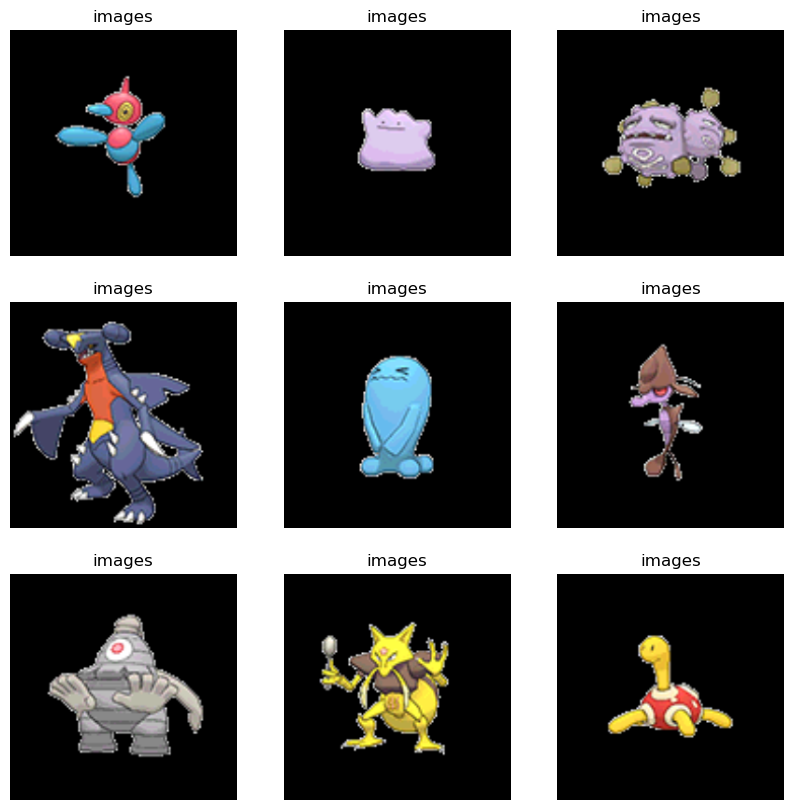

In [86]:
# 내부 폴더 명
class_names=train_ds.class_names 
print(class_names)

# 훈련 데이터세트의 처음 9개 이미지
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

['images']


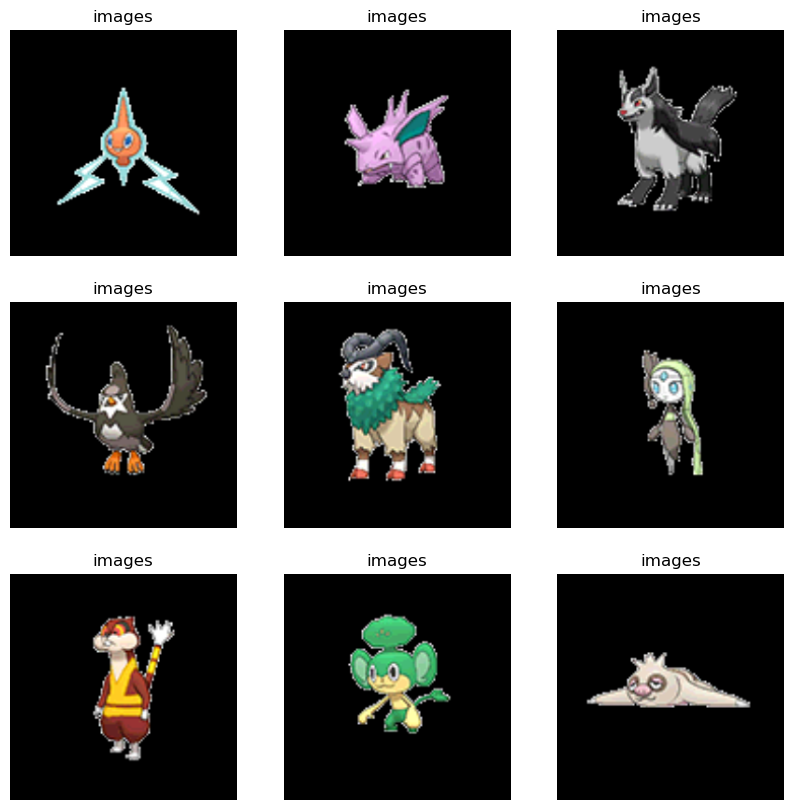

In [87]:
# 내부 폴더 명
class_names=test_ds.class_names 
print(class_names)

# 훈련 데이터세트의 처음 9개 이미지
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# 시작

2.  사전학습된 VGG16 모델 불러오기

In [88]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model

model=VGG16(weights='imagenet')
new_model=Model(
            inputs=model.input, outputs=model.get_layer("fc1").output
        )
# new_model.compile(loss='sparse_categorical_crossentropy',
#                      optimizer='adam',
#                      metrics=['accuracy'])

6. 신경망 모델 학습

In [89]:
# # 모델 학습
# history = new_model.fit(train_ds, epochs=5, # 마지막에 변경
#                         validation_data=test_ds)

# new_model.save("mo.h5")                        
                        
# # 최종 결과 리포트
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))

# from matplotlib import pyplot as plt

# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='testing acc')
# plt.title('Training and testing accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='testing loss')
# plt.title('Training and testing loss')
# plt.legend()

# plt.show()

# # 저장 모델 불러오기
# from keras.models import load_model

# new_model = load_model("mo.h5")

유사도 측정

In [90]:
import numpy as np

In [91]:
# 코사인 유사도 함수
def _cos_sin(A, B):
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

In [92]:
V1=np.array([1,2,3])
V2=np.array([0,0,3])
# np.linalg.norm(V1)
_cos_sin(V1,V2) # 유사도 1~-1

0.8017837257372732

In [93]:
# 지나간 layer 순서
dict([(layer.name, layer) for layer in new_model.layers])

{'input_4': <keras.src.engine.input_layer.InputLayer at 0x29000993fa0>,
 'block1_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a0ab3a0>,
 'block1_conv2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a050580>,
 'block1_pool': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x290011efb20>,
 'block2_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a0aae90>,
 'block2_conv2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a0c0460>,
 'block2_pool': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x2901a062f50>,
 'block3_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a079930>,
 'block3_conv2': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a0333a0>,
 'block3_conv3': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a0c2ec0>,
 'block3_pool': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x2901a0c3a00>,
 'block4_conv1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x2901a0c2cb0>,
 'block4

In [94]:
# 분류 모델을 지난 포켓몬들

In [95]:
features = []

import os
img_paths="./poke_img/images/images/"
file_list=os.listdir(img_paths)
file_list[:3]

['abomasnow.png', 'abra.png', 'absol.png']

In [96]:
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

for img_path in file_list:
    img=Image.open(img_paths+img_path)

    # Resize the image
    img = img.resize((224, 224))
    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x) #preprocess_input 함수는 모델에 필요한 형식에 이미지를 적절하게 맞추기위한 것. 일부 모델은 0에서 1까지의 값을 가진 이미지를 사용합니다. 다른 모델은 -1에서 +1까지
    # 빈리스트 추가해서 넣어보기
    # Extract Features
    feature = new_model.predict(x)[0] # 예측

    features.append(feature / np.linalg.norm(feature))

1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 97ms/step


c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 90ms/step


In [97]:
# 검색으로 들어온 포켓몬

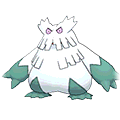

In [98]:
img_path="./poke_img/images/images/abomasnow.png"
img=Image.open(img_path)
img

In [99]:


# Resize the image
img = img.resize((224, 224))
# Convert the image color space
img = img.convert('RGB')
# Reformat the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) #preprocess_input 함수는 모델에 필요한 형식에 이미지를 적절하게 맞추기위한 것. 일부 모델은 0에서 1까지의 값을 가진 이미지를 사용합니다. 다른 모델은 -1에서 +1까지
# Extract Features
feature = new_model.predict(x)[0] # 예측
feature

1/1 [==============================] - 0s 100ms/step


array([9.383869 , 8.878915 , 0.       , ..., 1.4840211, 0.       ,
       9.870521 ], dtype=float32)

In [100]:
query=feature / np.linalg.norm(feature)

In [101]:
query

array([0.02942306, 0.02783978, 0.        , ..., 0.00465314, 0.        ,
       0.03094895], dtype=float32)

In [102]:
len(query)

4096

In [103]:
# 유사도 차이

In [104]:
for one in features:
    print(one)


[0.02942306 0.02783978 0.         ... 0.00465314 0.         0.03094895]
[0.0140446  0.04033538 0.         ... 0.         0.         0.        ]
[0.         0.0330464  0.         ... 0.         0.         0.01515652]
[0.         0.03311887 0.         ... 0.         0.00657742 0.0463337 ]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.02300122 0.         ... 0.01826011 0.03176197 0.        ]
[0.02716334 0.04744859 0.         ... 0.         0.         0.00327108]
[0.02274123 0.04297756 0.02445729 ... 0.01883496 0.         0.00910965]
[0.01957896 0.0803481  0.         ... 0.00662793 0.         0.        ]
[0.0000000e+00 2.0525131e-02 0.0000000e+00 ... 6.5540793e-05 0.0000000e+00
 0.0000000e+00]
[0.         0.01779547 0.         ... 0.05769592 0.01355257 0.        ]
[0.02527919 0.05412681 0.         ... 0.         0.04623884 0.02331181]
[0.         0.00600636 0.01491029 ... 0.         0.         0.01411283]
[0. 0. 0. ... 0. 0. 0.]
[0.02957498 0.06257481 0.00254779 ... 0.         0.03363321 0.       

In [105]:
a=list(range(10))
a[:5:-1]

[9, 8, 7, 6]

In [106]:
similars=[]
for one in features:
    similars.append(_cos_sin(one, query)) # 틀렸을 확률
# 가장 유사도가 큰 순으로 
ids=np.argsort(similars)

scores = [(similars[id], file_list[id], id) for id in ids[:30:-1]]
scores

[(1.0, 'abomasnow.png', 0),
 (0.5934226, 'excadrill.png', 205),
 (0.58862877, 'snover.png', 648),
 (0.58421195, 'stunky.png', 674),
 (0.580182, 'torterra.png', 716),
 (0.57821316, 'starmie.png', 667),
 (0.5721099, 'carracosta.png', 84),
 (0.57048696, 'delibird.png', 151),
 (0.56992024, 'swalot.png', 682),
 (0.5678318, 'regice.png', 558),
 (0.564255, 'gardevoir.png', 241),
 (0.561944, 'grotle.png', 276),
 (0.5603925, 'walrein.png', 769),
 (0.5583773, 'gyarados.png', 286),
 (0.5582322, 'avalugg.png', 29),
 (0.55598545, 'jynx.png', 329),
 (0.55559015, 'togepi.png', 710),
 (0.55203664, 'armaldo.png', 23),
 (0.55069476, 'maractus.png', 415),
 (0.54663146, 'zweilous.png', 807),
 (0.54641116, 'rampardos.png', 553),
 (0.5456627, 'gliscor.png', 255),
 (0.54543567, 'heatran.png', 294),
 (0.54354334, 'mismagius.png', 449),
 (0.54298496, 'skuntank.png', 633),
 (0.5409844, 'galvantula.png', 238),
 (0.53911036, 'qwilfish.png', 549),
 (0.53836304, 'ducklett.png', 178),
 (0.53816074, 'gastrodon.png', 

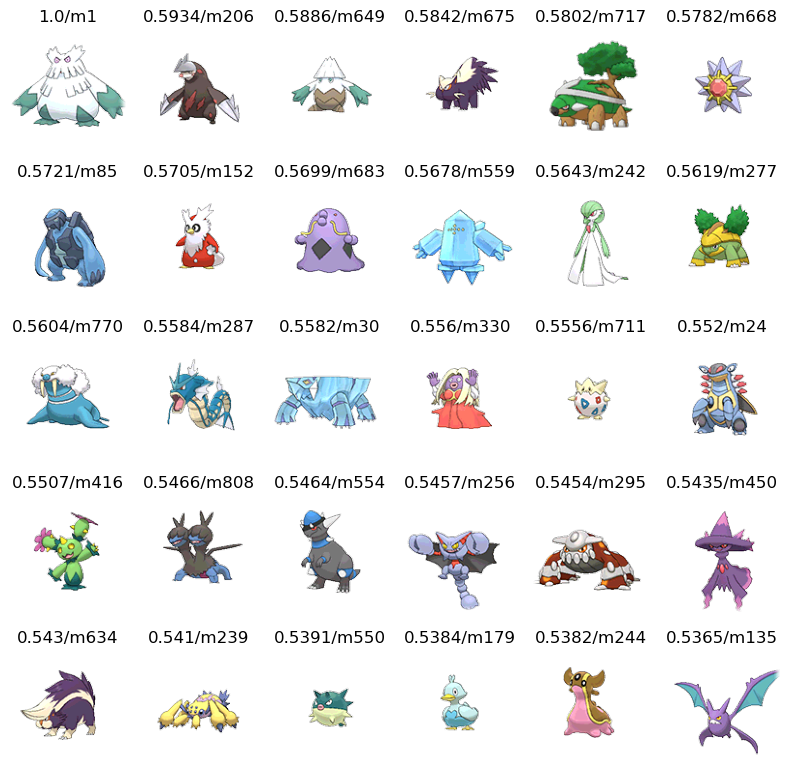

In [107]:
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],4)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(img_paths+score[1]))
fig.tight_layout()
plt.show()